In [19]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [20]:
pdb='/Users/NLoui/Desktop/Chem101_S24/Exercise2/data/ABL1.pdb'
trajectory='/Users/NLoui/Desktop/Chem101_S24/Exercise2/data/ABL1.dcd'
outdir='/Users/NLoui/Desktop/Chem101_S24/Exercise2/outdir'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir: /Users/NLoui/Desktop/Chem101_S24/Exercise2/outdir
pdb: /Users/NLoui/Desktop/Chem101_S24/Exercise2/data/ABL1.pdb
trjaectory: /Users/NLoui/Desktop/Chem101_S24/Exercise2/data/ABL1.dcd


In [21]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [22]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [23]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 42

In [24]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [25]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

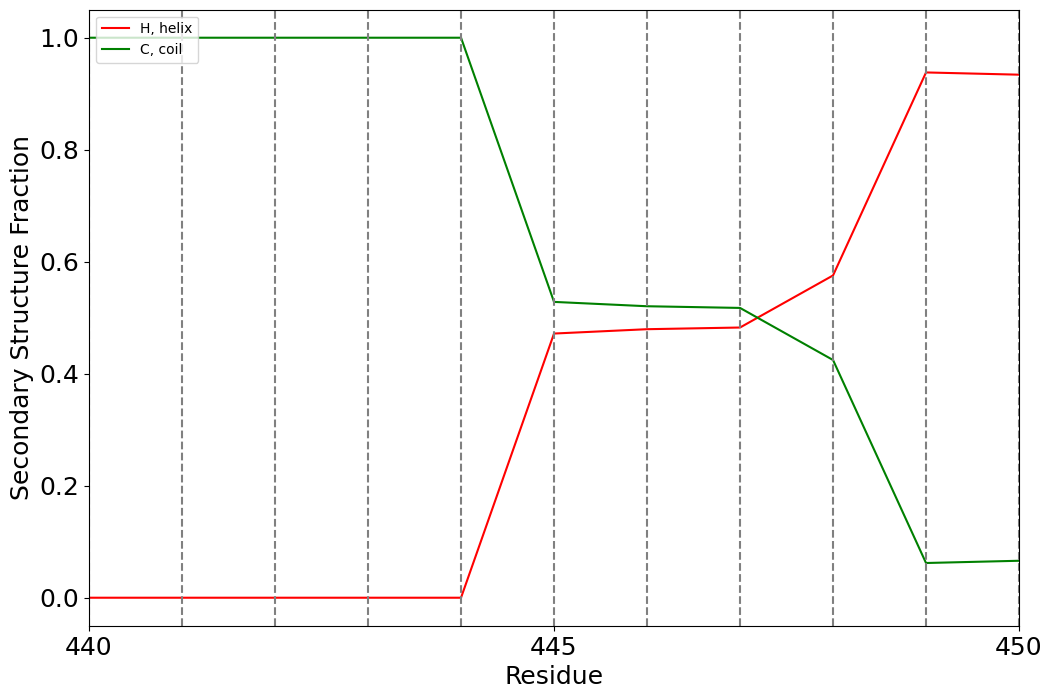

In [214]:
dssp = md.compute_dssp(trj, simplified=True)

def dssp_convert(dssp):
    dsspH = np.copy(dssp)
    dsspE = np.copy(dssp)
    dsspC = np.copy(dssp)

    dsspH[dsspH == 'H'] = 1
    dsspH[dsspH == 'E'] = 0
    dsspH[dsspH == 'C'] = 0
    dsspH[dsspH == 'NA'] = 0
    dsspH = dsspH.astype(int)
    TotalH = np.sum(dsspH, axis=1)
    Hprop = np.sum(dsspH, axis=0).astype(float) / len(dsspE)

    dsspE[dsspE == 'H'] = 0
    dsspE[dsspE == 'E'] = 1
    dsspE[dsspE == 'C'] = 0
    dsspE[dsspE == 'NA'] = 0
    dsspE = dsspE.astype(int)
    TotalE = np.sum(dsspE, axis=1)
    Eprop = np.sum(dsspE, axis=0).astype(float) / len(dsspE)

    dsspC[dsspC == 'H'] = 0
    dsspC[dsspC == 'E'] = 0
    dsspC[dsspC == 'C'] = 1
    dsspC[dsspC == 'NA'] = 0
    dsspC = dsspC.astype(int)
    TotalC = np.sum(dsspC, axis=1)
    Cprop = np.sum(dsspC, axis=0).astype(float) / len(dsspE)

    return Hprop, Eprop, Cprop

Hprop, Eprop, Cprop = dssp_convert(dssp)

plt.figure(figsize=(12, 8))
plt.plot(residue_num, Hprop, c='r', label='H, helix')
#plt.plot(residue_num, Eprop, c='b', label='E, strand')
plt.plot(residue_num, Cprop, c='g', label='C, coil')


plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Structure Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(440, 450)

# Get the minimum and maximum x-axis values
x_min, x_max = plt.xlim()

# Customize the number of x-axis ticks
num_ticks = int(x_max - x_min + 1)  # Each integer value from x_min to x_max
plt.xticks(np.arange(x_min, x_max + 1, 5))

# Add vertical lines to match the x-axis ticks
for i in range(int(x_min), int(x_max) + 1):
    plt.axvline(x=i, color='gray', linestyle='--')

plt.show()


In [212]:
for value1, value2, value3 in zip(residue_id, Hprop, Cprop):
    if np.isclose(value2, 0.5, atol=0.1) or np.isclose(value3, 0.5, atol=0.1):
        print(value1, value2, value3)

243 0.0 0.463
251 0.0 0.57425
316 0.0 0.41825
445 0.47175 0.52825
446 0.4795 0.5205
447 0.4825 0.5175
448 0.5755 0.4245


***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

(350.0, 400.0)

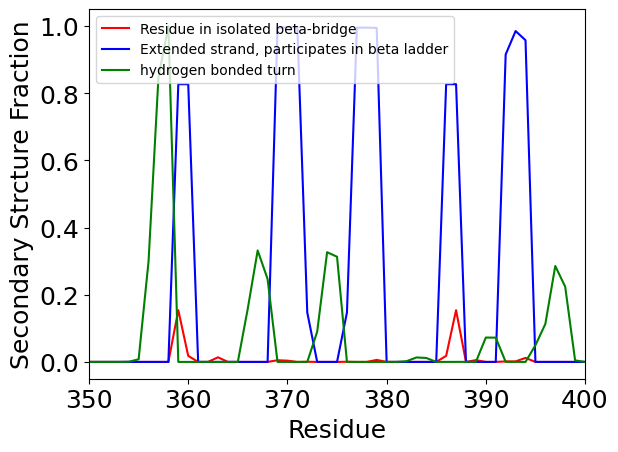

In [104]:
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type 
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert(dssp):
    # Copy dssp into new arrays
    dsspB = np.copy(dssp)
    dsspE = np.copy(dssp)
    dsspT = np.copy(dssp)
    
    # Identify 'B' structure
    dsspB[dsspB != 'B'] = 0  # Set non-'B' values to 0
    dsspB[dsspB == 'B'] = 1  # Set 'B' values to 1
    dsspB = dsspB.astype(int)  # Convert array to integer type
    TotalB = np.sum(dsspB, axis=1)  # Total 'B' count for each row
    Bprop=np.sum(dsspB,axis=0).astype(float)/len(dssp) 
    
    # Identify 'E' structure
    dsspE[dsspE != 'E'] = 0  # Set non-'E' values to 0
    dsspE[dsspE == 'E'] = 1  # Set 'E' values to 1
    dsspE = dsspE.astype(int)  # Convert array to integer type
    TotalE = np.sum(dsspE, axis=1)  # Total 'E' count for each row
    Eprop = np.sum(dsspE, axis=0).astype(float) / len(dssp)  # Proportion of 'E' in each column
    
    # Identify 'T' structure
    dsspT[dsspT != 'T'] = 0  # Set non-'T' values to 0
    dsspT[dsspT == 'T'] = 1  # Set 'T' values to 1
    dsspT = dsspT.astype(int)  # Convert array to integer type
    TotalT = np.sum(dsspT, axis=1)  # Total 'T' count for each row
    Tprop = np.sum(dsspT, axis=0).astype(float) / len(dssp)  # Proportion of 'T' in each column
    
    return Bprop, Eprop, Tprop

Bprop,Eprop,Tprop=dssp_convert(dssp_full)

plt.plot(residue_num,Bprop,c='r',label='Residue in isolated beta-bridge')
plt.plot(residue_num,Eprop,c='b',label='Extended strand, participates in beta ladder')
plt.plot(residue_num,Tprop,c='g',label='hydrogen bonded turn')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(350,400)

***Challenge Problem #1***

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

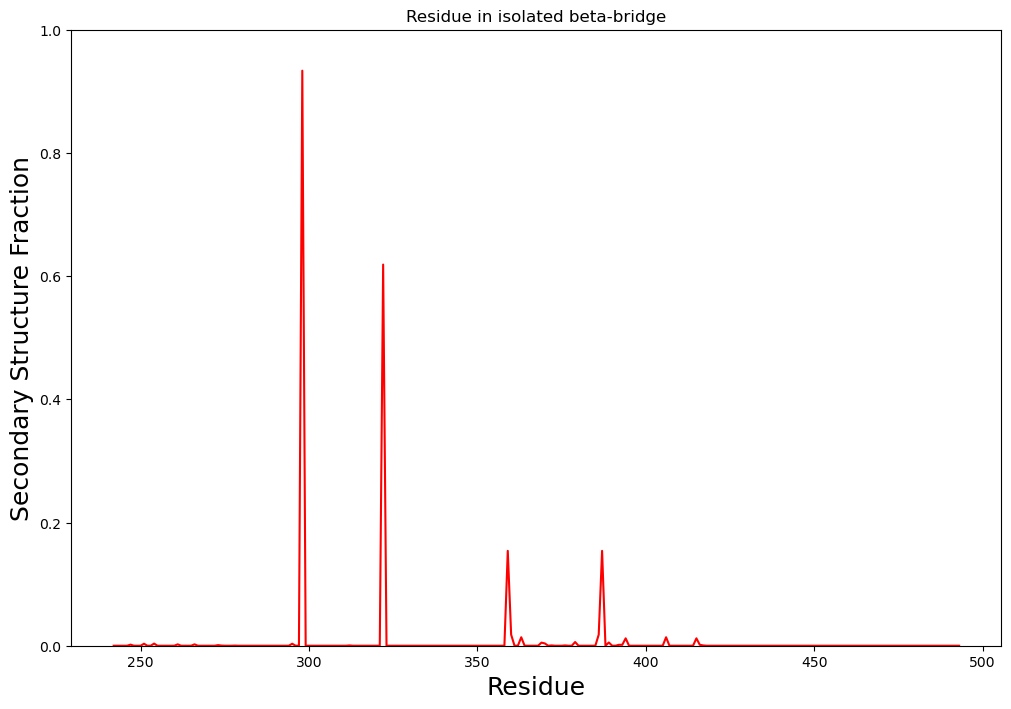

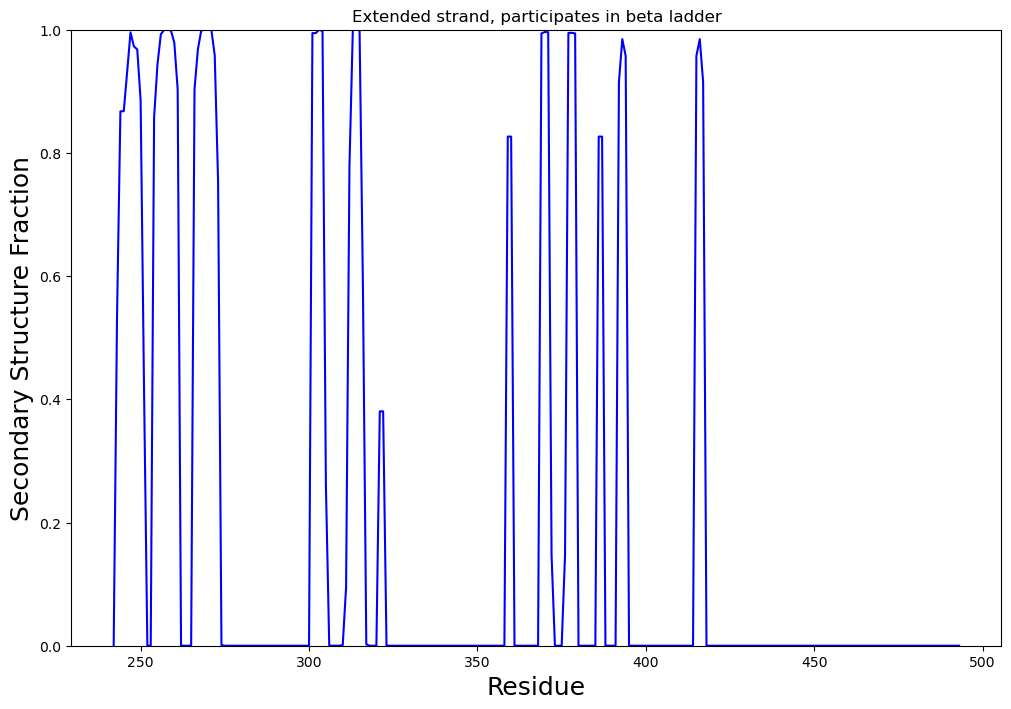

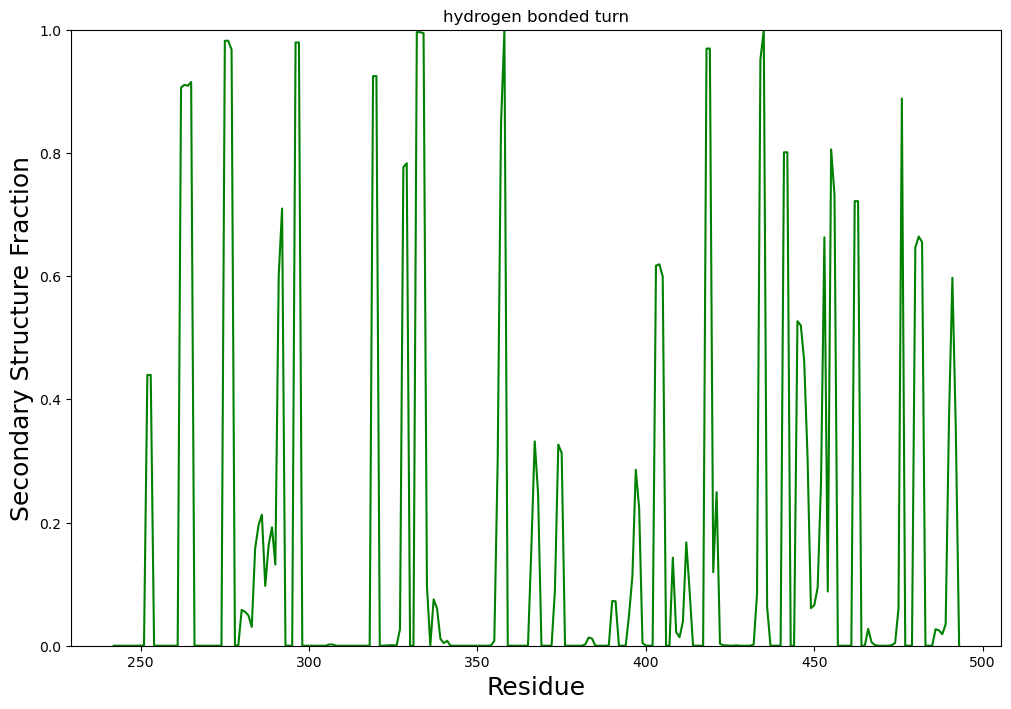

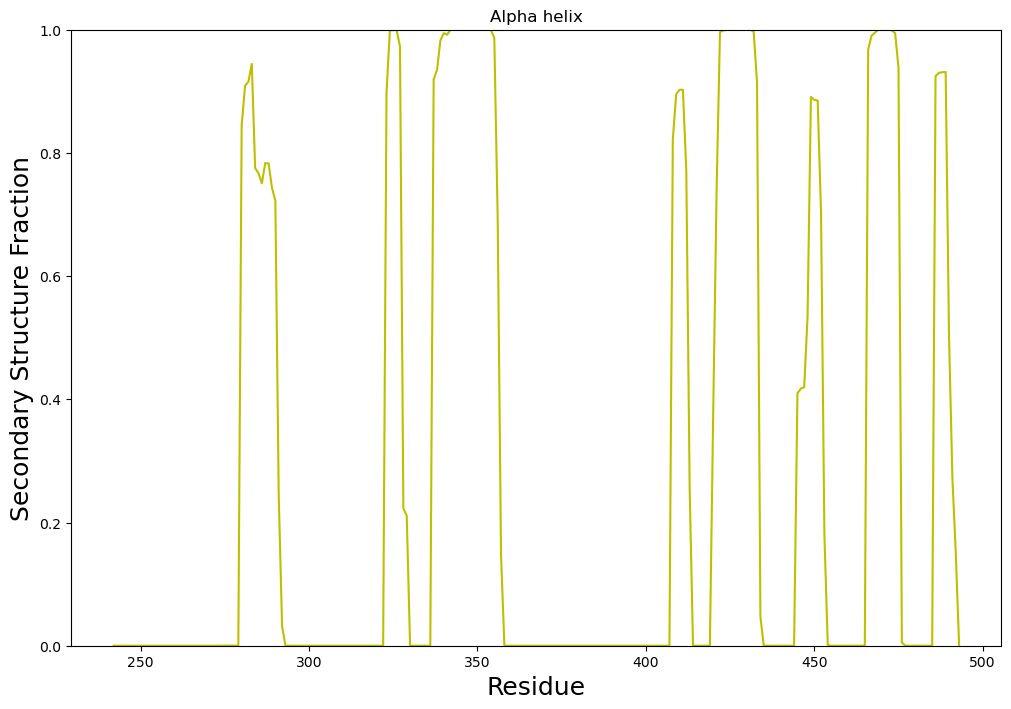

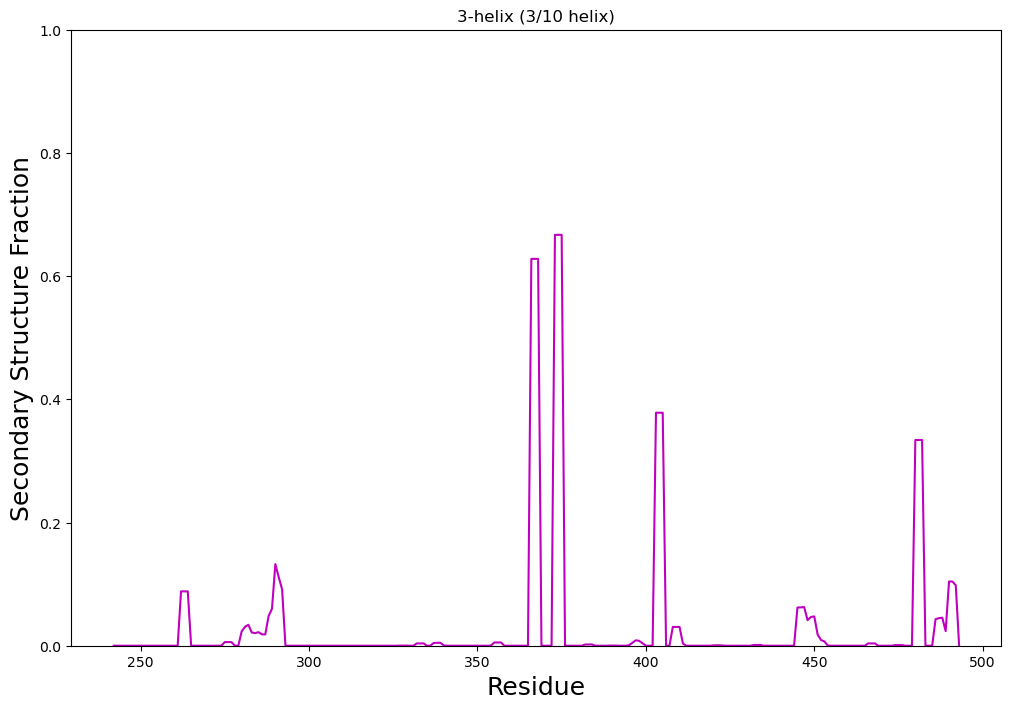

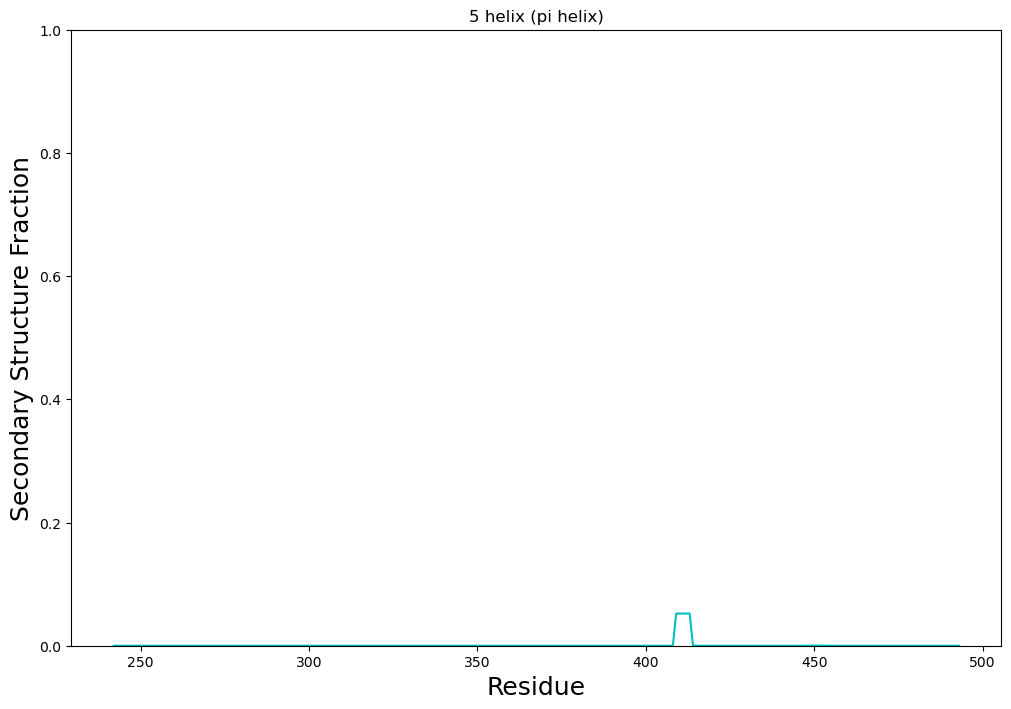

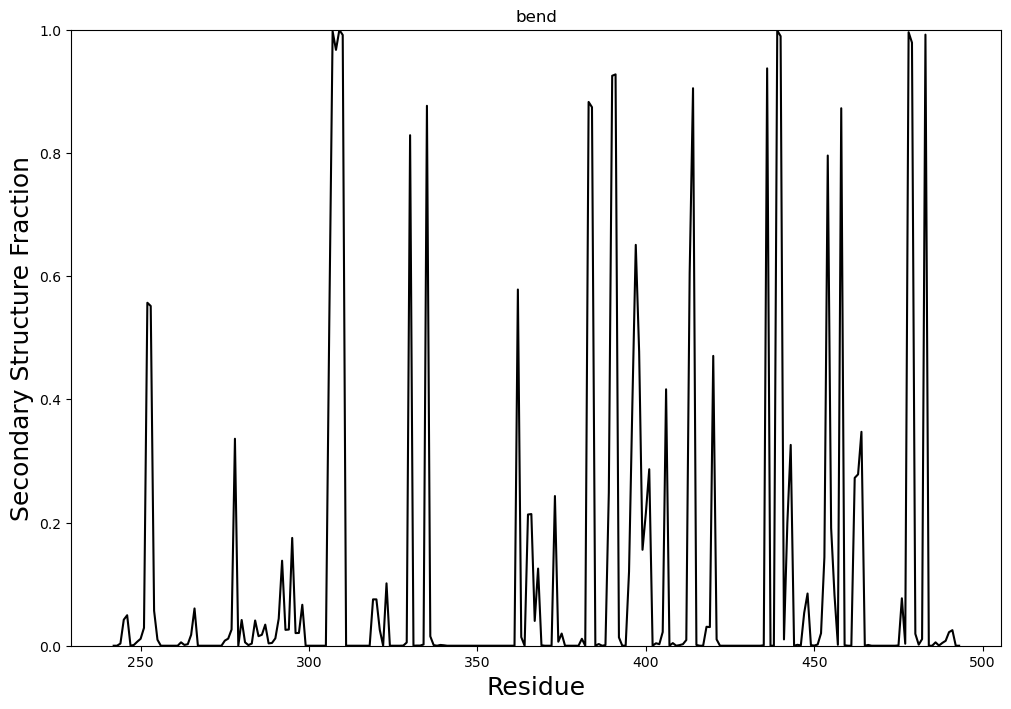

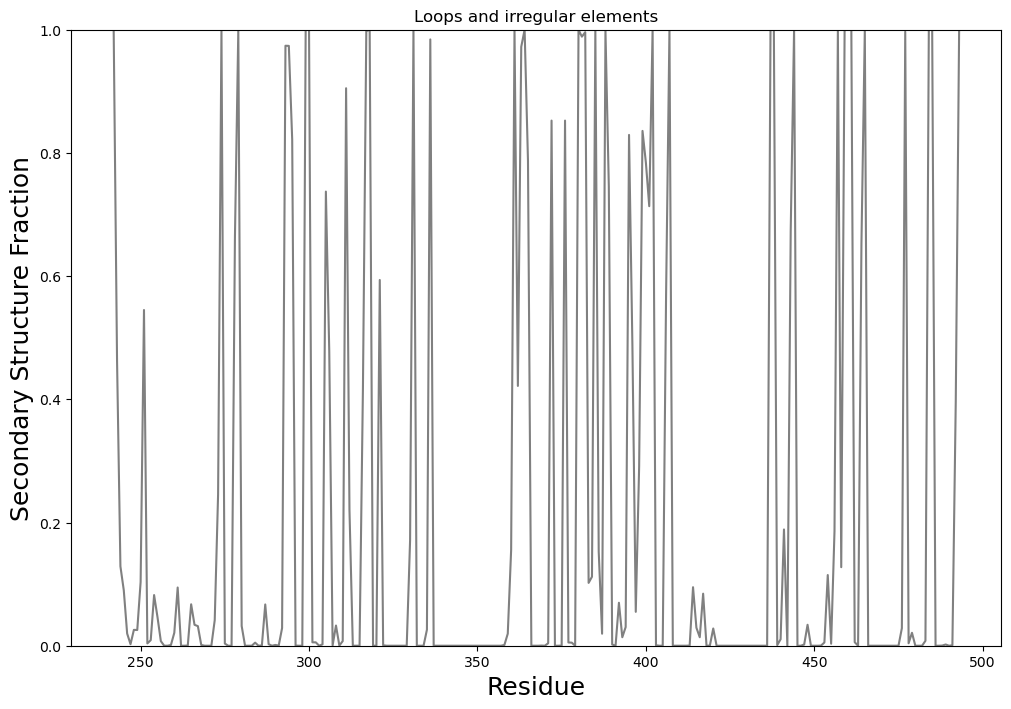

In [73]:
#### Challenge Problem 
#-----------------------------------------------------#
#### Write a Function to Compute the Population of Any Secondary Structure Type
def dssp_convert(dssp):
    structures = ['B', 'E', 'T', 'H', 'G', 'I', 'S', ' ']  # Include ' ' (empty string) in the list of structures
    props = {}

    for struct in structures:
        dssp_struct = np.copy(dssp)
        dssp_struct[dssp_struct != struct] = 0
        dssp_struct[dssp_struct == struct] = 1
        dssp_struct = dssp_struct.astype(int)
        
        total_count = np.sum(dssp_struct, axis=1)
        prop = np.sum(dssp_struct, axis=0).astype(float) / len(dssp)
        
        props[struct + 'prop'] = prop
    
    return props

populations = dssp_convert(dssp_full)

# Plot each population
colors = ['r', 'b', 'g', 'y', 'm', 'c', 'k', 'gray']
labels = ['B', 'E', 'T', 'H', 'G', 'I', 'S', 'Blank']
title_labels = ['Residue in isolated beta-bridge',
        'Extended strand, participates in beta ladder',
        'hydrogen bonded turn',
        'Alpha helix',
        '3-helix (3/10 helix)',
        '5 helix (pi helix)','bend',
        'Loops and irregular elements']
#colors = ['r', 'b']
#labels = ['B', 'E']

for struct, pop, color, label, title_label in zip(populations.keys(), populations.values(), colors, labels, title_labels):
    plt.figure(figsize=(12, 8))
    plt.plot(residue_num, pop, c=color)
    plt.xlabel('Residue', size=18)
    plt.ylabel('Secondary Structure Fraction', size=18)
    plt.title(title_label)
    plt.ylim(0,1)
    #plt.xlim(350,400)
    plt.show()

#for struct, pop, color, label in zip(populations.keys(), populations.values(), colors, labels):
    #plt.plot(residue_num, pop, c=color, label=label)



In [106]:
#### Challenge Problem Pt 2
dssp_full=md.compute_dssp(trj,simplified=False)

#### Write code to output the residue numbers of every residue with > 90% each SS type
def dssp_convert_with_residue_numbers(dssp):
    structures = ['B', 'E', 'T', 'H', 'G', 'I', 'S', ' ']  # Include ' ' (empty string) in the list of structures
    props = {}

    # Dictionary to store residue numbers for each structure type
    residue_numbers = {struct: [] for struct in structures}

    for struct in structures:
        dssp_struct = np.copy(dssp)
        dssp_struct[dssp_struct != struct] = 0
        dssp_struct[dssp_struct == struct] = 1
        dssp_struct = dssp_struct.astype(int)
        
        total_count = np.sum(dssp_struct, axis=1)
        prop = np.sum(dssp_struct, axis=0).astype(float) / len(dssp_struct)
        
        props[struct + 'prop'] = prop
        
        # Find residue numbers with >90% of the current secondary structure type
        for i, p in enumerate(prop):  # Use enumerate(prop) to loop over prop with its index
            if p > 0.9:
                residue_numbers[struct].append(residue_num[i])  # Append the corresponding residue number
    
    return props, residue_numbers
    
    
populations, residue_numbers = dssp_convert_with_residue_numbers(dssp_full)

# Output residue numbers for each structure type
for struct, numbers in residue_numbers.items():
    print(f'Residue numbers with >90% {struct} structure: {numbers}')

Residue numbers with >90% B structure: [298]
Residue numbers with >90% E structure: [246, 247, 248, 249, 255, 256, 257, 258, 259, 260, 261, 266, 267, 268, 269, 270, 271, 272, 301, 302, 303, 304, 313, 314, 315, 369, 370, 371, 377, 378, 379, 392, 393, 394, 415, 416, 417]
Residue numbers with >90% T structure: [262, 263, 264, 265, 275, 276, 277, 296, 297, 319, 320, 332, 333, 334, 358, 418, 419, 434, 435]
Residue numbers with >90% H structure: [281, 282, 283, 324, 325, 326, 327, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 410, 411, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 486, 487, 488, 489]
Residue numbers with >90% G structure: []
Residue numbers with >90% I structure: []
Residue numbers with >90% S structure: [307, 308, 309, 310, 390, 391, 414, 436, 439, 440, 478, 479, 483]
Residue numbers with >90%   structure: [242, 274, 279, 293, 294, 299, 300, 311, 317, 318, 331, 3

***HOMEWORK Problem 2***

**Identify a residue that has a substantial population (>10%) of a second secondary structure assignment 
(for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation**

In [221]:
dssp=md.compute_dssp(trj,simplified=True)
dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_sel_prop(dssp, proportions):
    structures = ['H','E','C']
    # Dictionary to store residue numbers for each structure type
    residue_numbers = {struct: [] for struct in structures}
    props={}


    for struct, prop_value in proportions.items():
        dssp_struct = np.copy(dssp)
        dssp_struct[dssp_struct != struct] = 0
        dssp_struct[dssp_struct == struct] = 1
        dssp_struct = dssp_struct.astype(int)
        
        total_count = np.sum(dssp_struct, axis=1)
        prop = np.sum(dssp_struct, axis=0).astype(float) / len(dssp_struct)
        
        props[struct + 'prop'] = prop
        
        # Debug information
        #print("Proportion for structure", struct, ":", prop)

        # Find residue numbers with desired proportions of the current secondary structure type
        for i, p in enumerate(prop):
            if np.isclose(p, prop_value, atol=0.1):  # Check for exact equality using np.isclose()
                residue_numbers[struct].append(residue_num[i])  # Append the corresponding residue number
    
    
    return residue_numbers, props
     
def match(residue_numbers):
    matching_numbers = {}

    for struct, numbers in residue_numbers.items():
        for other_struct, other_numbers in residue_numbers.items():
            if struct != other_struct:
                matching = set(numbers) & set(other_numbers)
                if matching:
                    matching_numbers[(struct, other_struct)] = matching

    return matching_numbers

# Example usage

proportions = {'H': 0.5, 'C': 0.5}

residue_numbers, props = dssp_sel_prop(dssp, proportions)
valid_residue_numbers=match(residue_numbers)

####----------------------------------####
# Output residue numbers for each structure type
for struct, numbers in residue_numbers.items():
    if struct in proportions:  # Check if the structure is present in proportions
        print(f'Residue numbers with >= {proportions[struct]*100}% {struct} structure: {numbers}')

# Output residue numbers that matches both
print(f'Residue numbers that fulfill both conditions: {valid_residue_numbers}')




{'H': [445, 446, 447, 448], 'E': [], 'C': [243, 251, 316, 445, 446, 447, 448]}
Residue numbers with >= 50.0% H structure: [445, 446, 447, 448]
Residue numbers with >= 50.0% C structure: [243, 251, 316, 445, 446, 447, 448]
Residue numbers that fulfill both conditions: {('H', 'C'): {448, 445, 446, 447}, ('C', 'H'): {448, 445, 446, 447}}


In [74]:
#Find all the frames where a given residue is H or E
residue_number=340
array_index=residue_number-242
print(np.asarray(residue_num)[array_index])
helix_frames=np.where(dssp[:,array_index]=='H')
beta_frames=np.where(dssp[:,array_index]=='E')

print("Residue %s"%np.asarray(residue_num)[array_index])
print("helix_frames:",helix_frames)
print("helix_frames:",beta_frames)

340
Residue 340
helix_frames: (array([   0,    1,    2, ..., 3997, 3998, 3999]),)
helix_frames: (array([], dtype=int64),)


In [75]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [76]:
np.shape(phis[:,0])

(4000,)

In [77]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [78]:
sequence

' [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER349, ALA350, MET351, GLU352, TYR353, LEU354, GLU355, LYS356, LYS357, ASN358, PHE359, ILE360, HIS361, ARG362, ASP363, LEU364, ALA365, ALA36

In [85]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




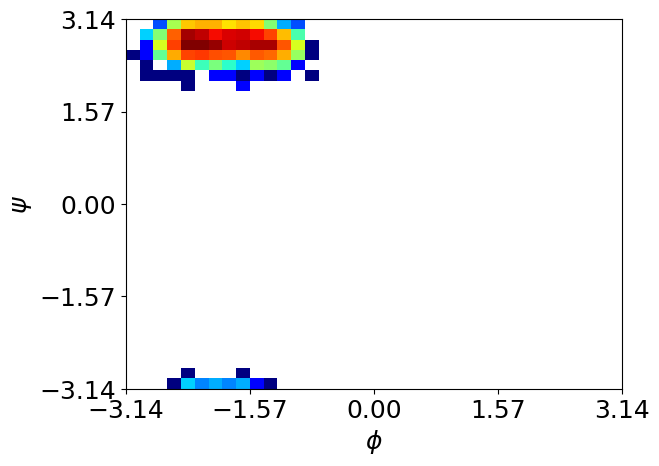

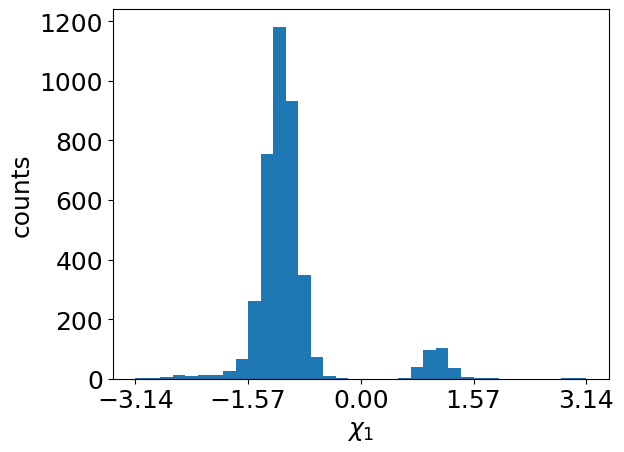

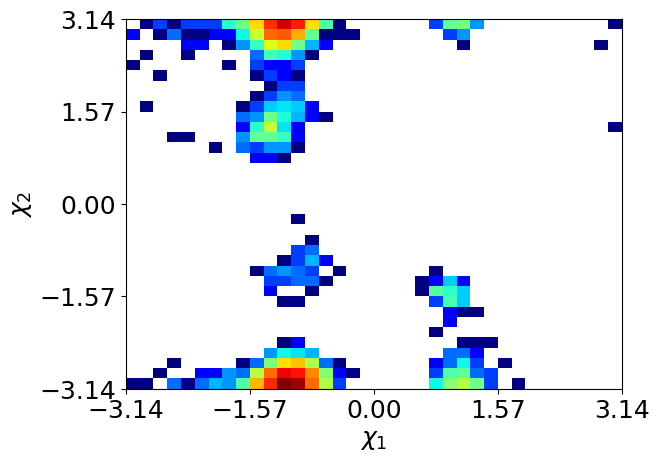

In [18]:
plot_phipsi(308)
plt.clf()
plot_chi(308)

In [83]:
#Lets Visualize Some Rotamers
#Lets Find all the VAL residues 
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
VAL_indices=np.where(resnames=='VAL')
Val_resnums=resnums[VAL_indices]
Val_resnums

array([256, 260, 268, 270, 280, 289, 299, 304, 335, 338, 339, 371, 377,
       379, 422, 427, 448, 468])

Residue 256


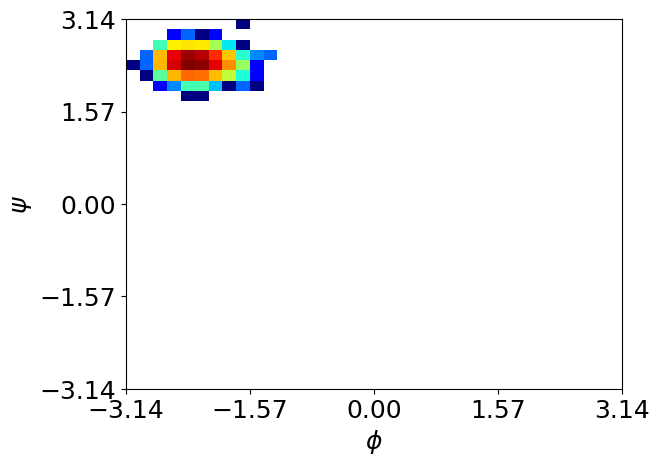

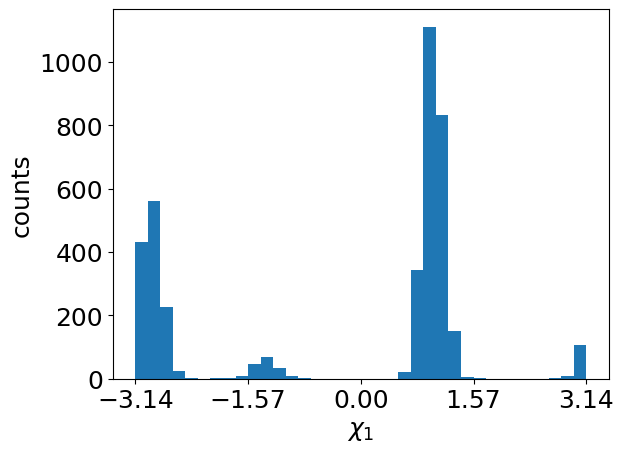

Residue 260


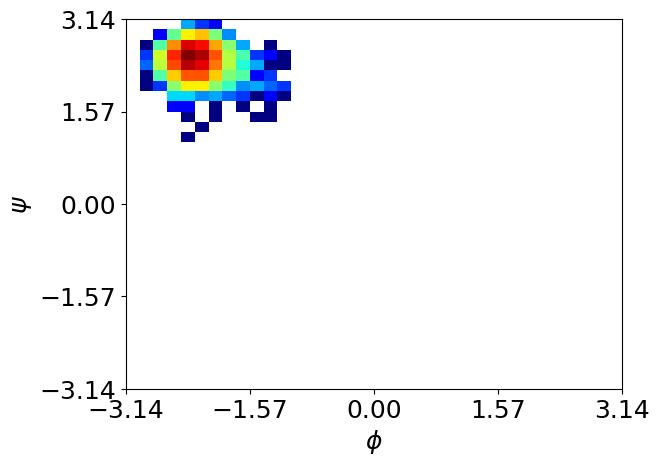

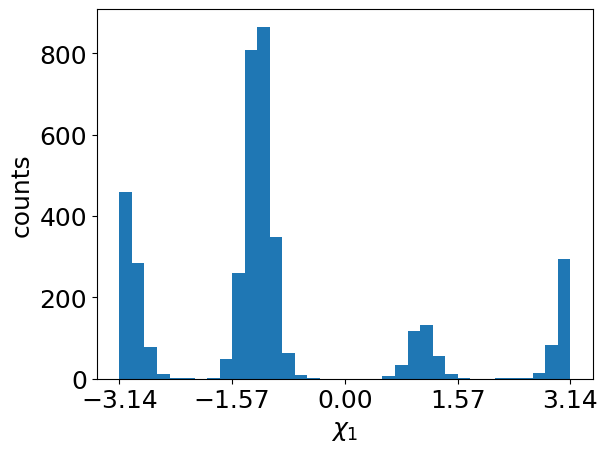

Residue 268


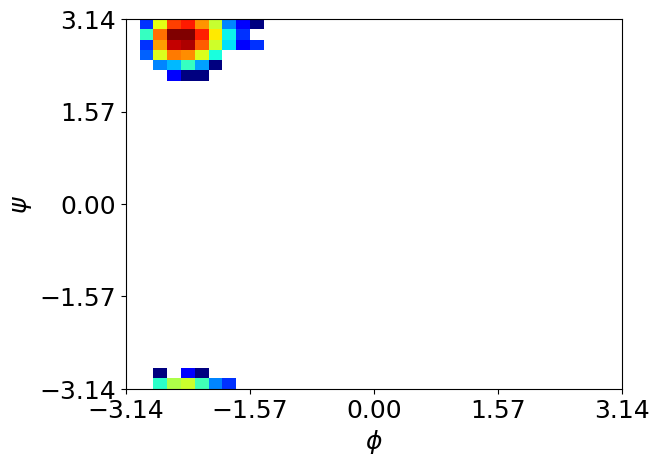

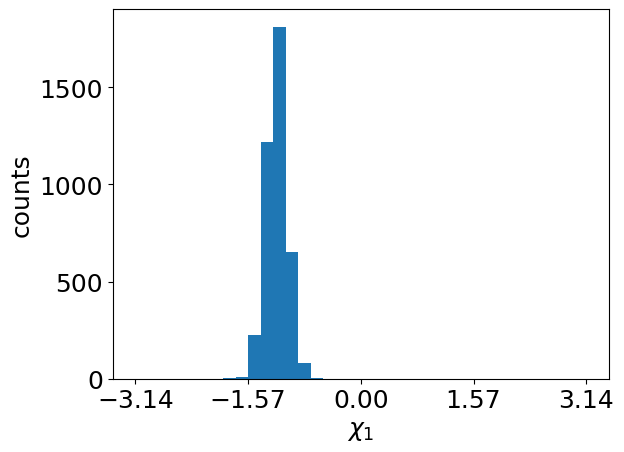

Residue 270


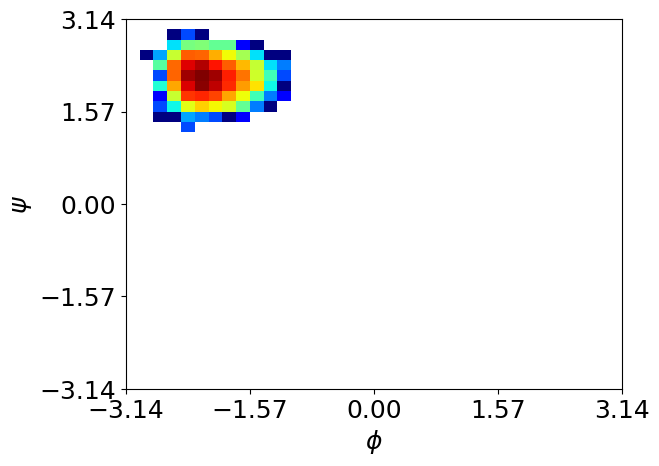

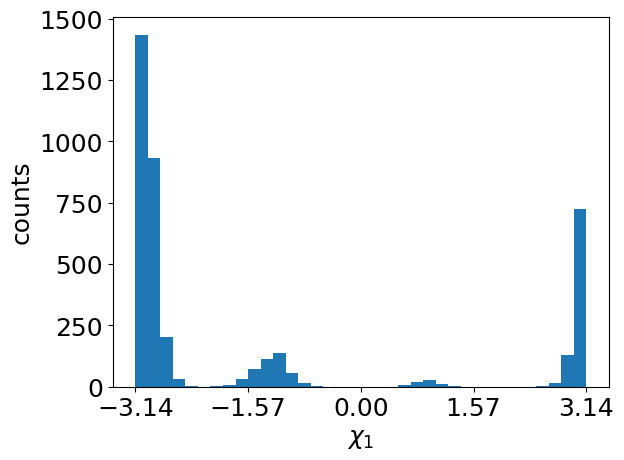

Residue 280


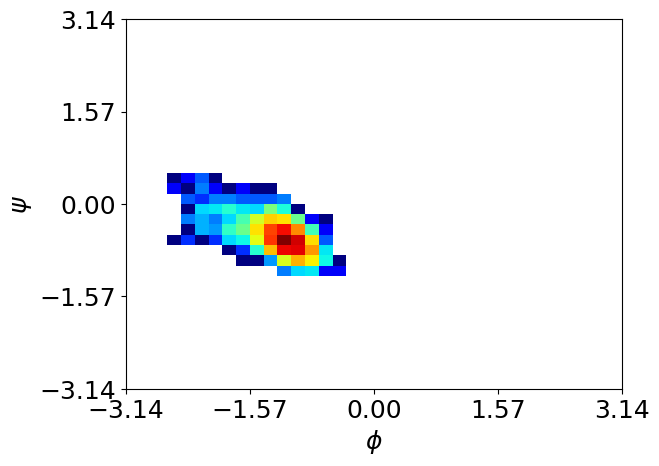

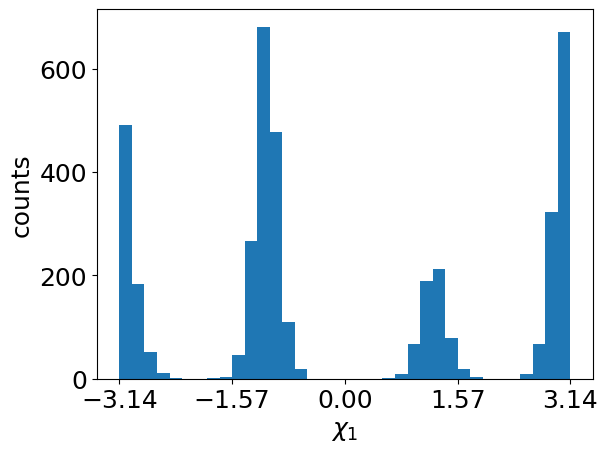

Residue 289


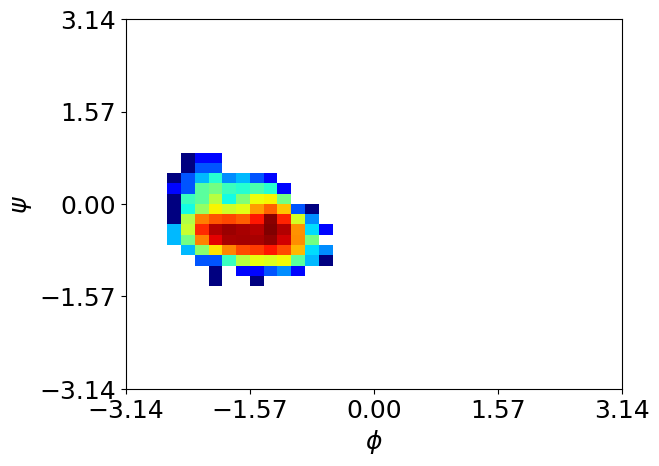

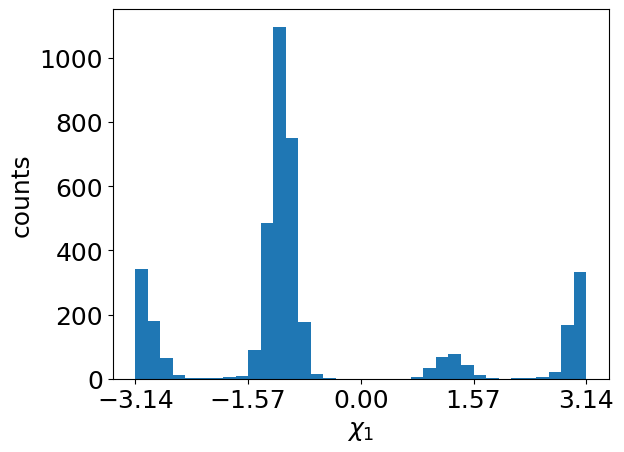

Residue 299


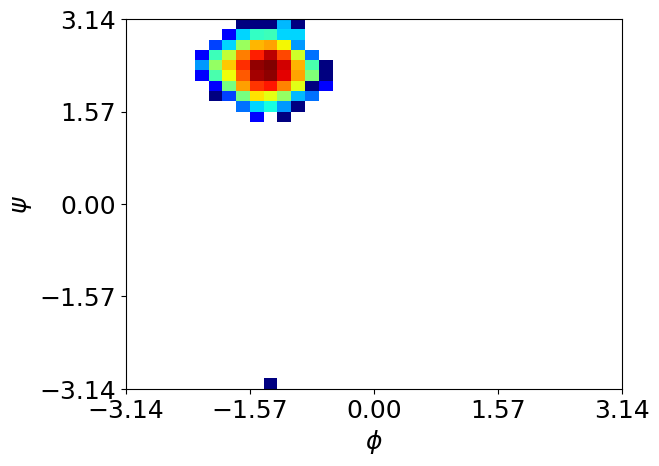

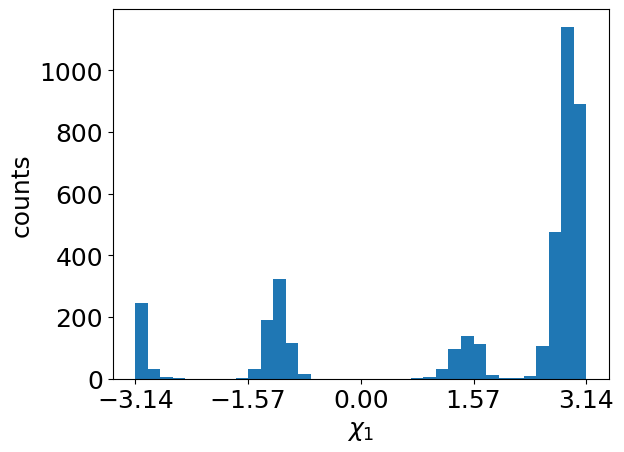

Residue 304


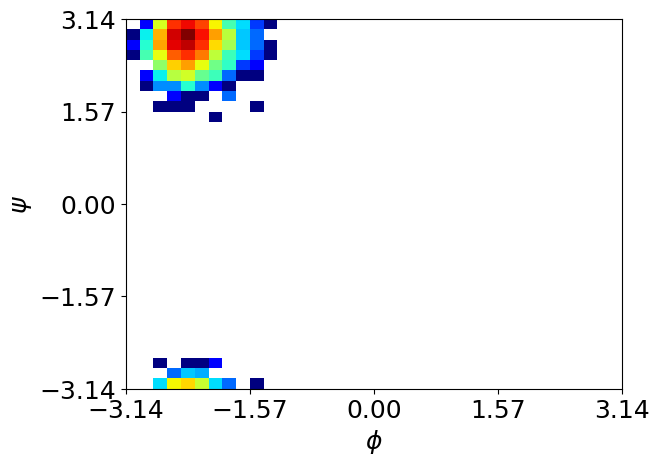

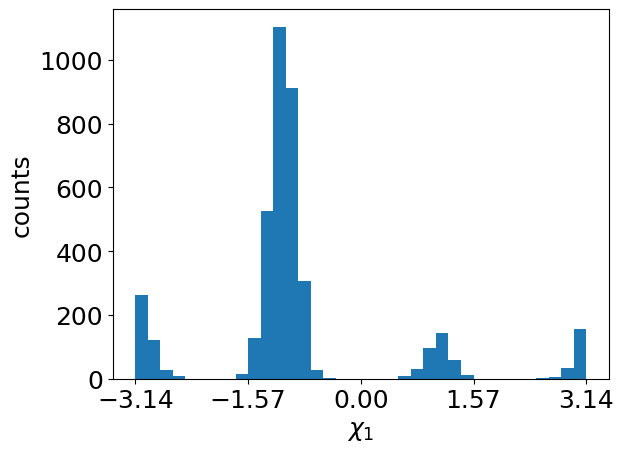

Residue 335


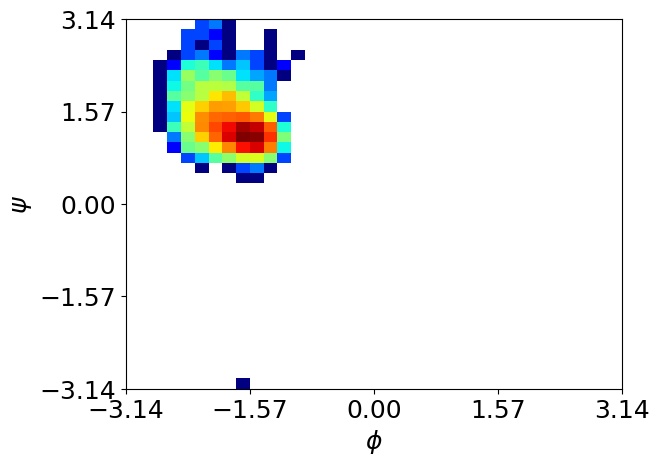

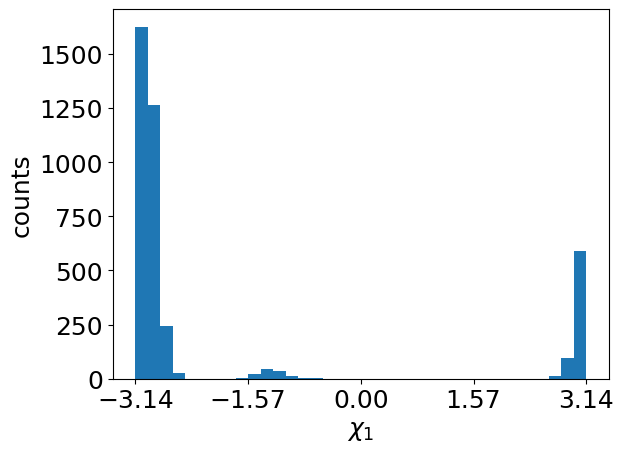

Residue 338


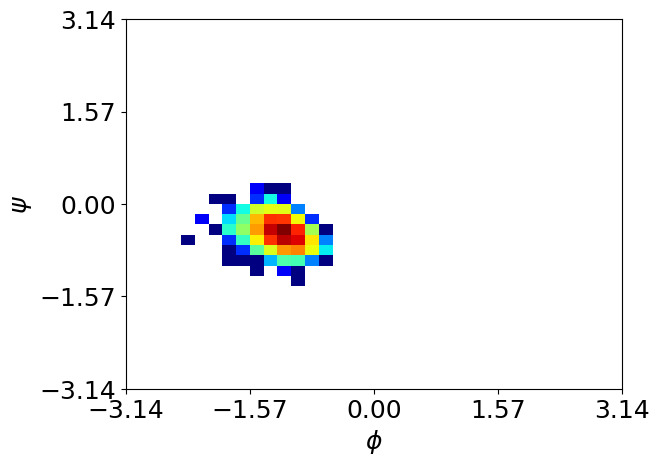

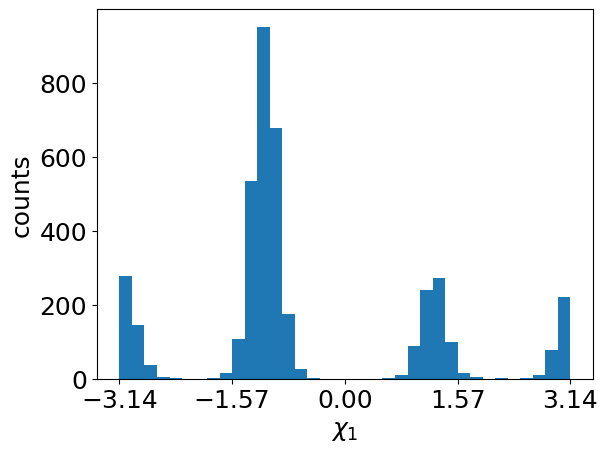

Residue 339


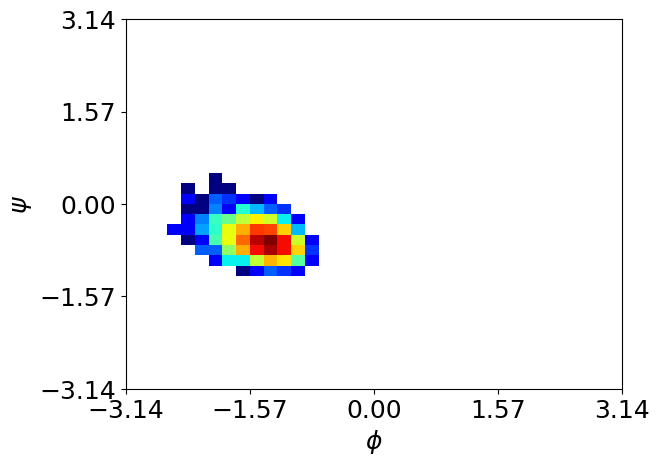

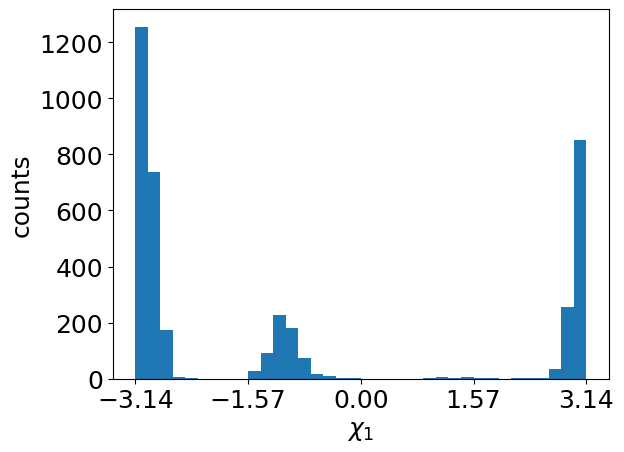

Residue 371


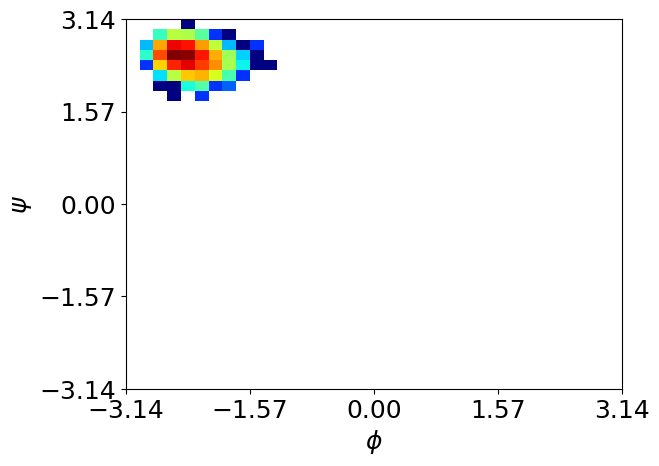

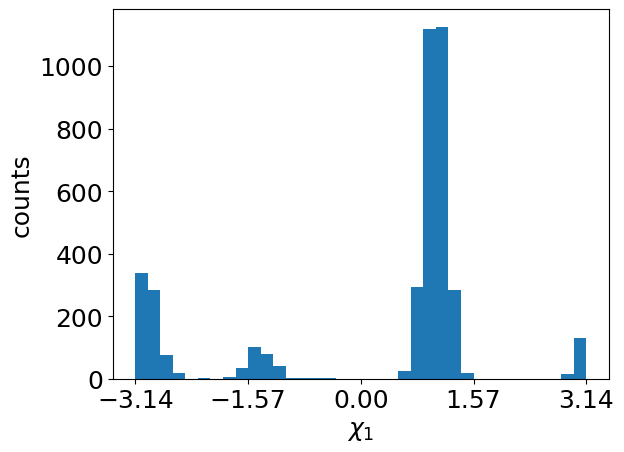

Residue 377


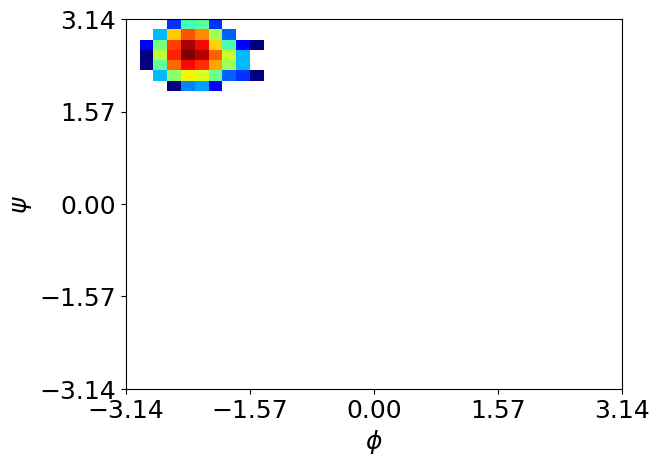

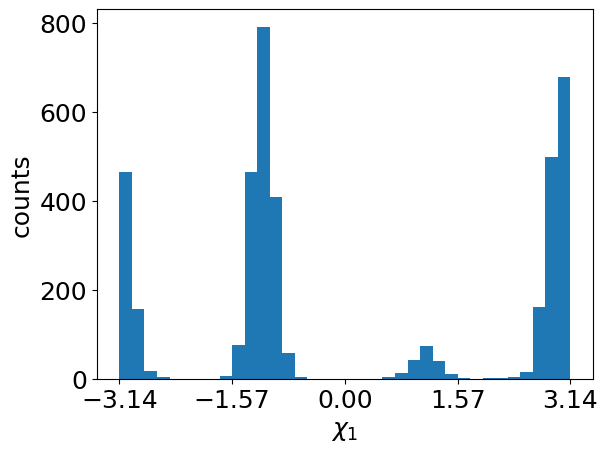

Residue 379


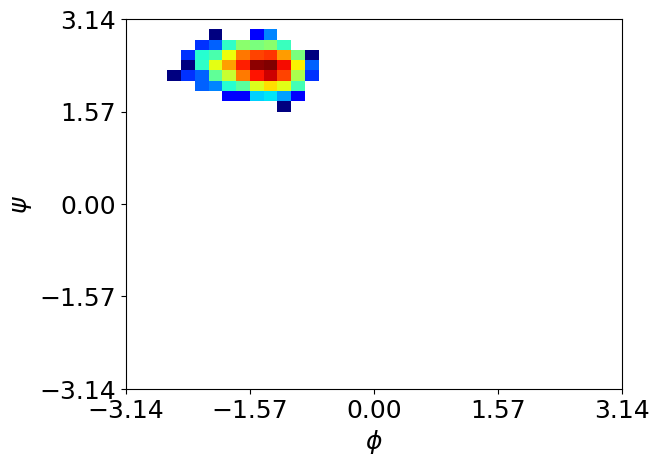

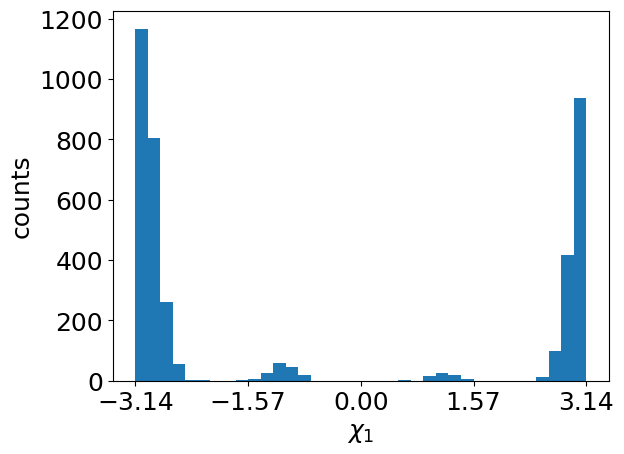

Residue 422


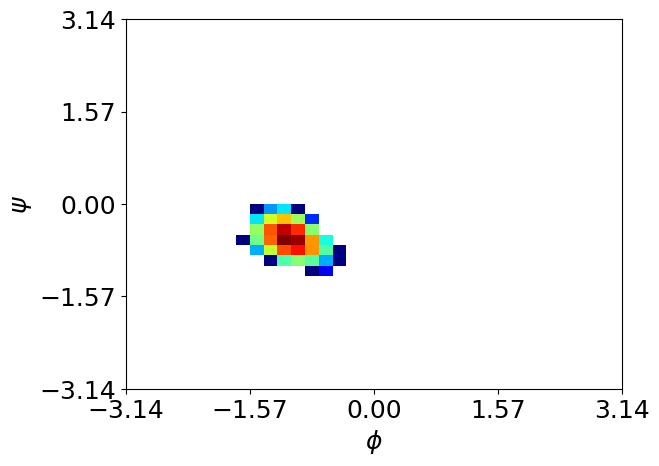

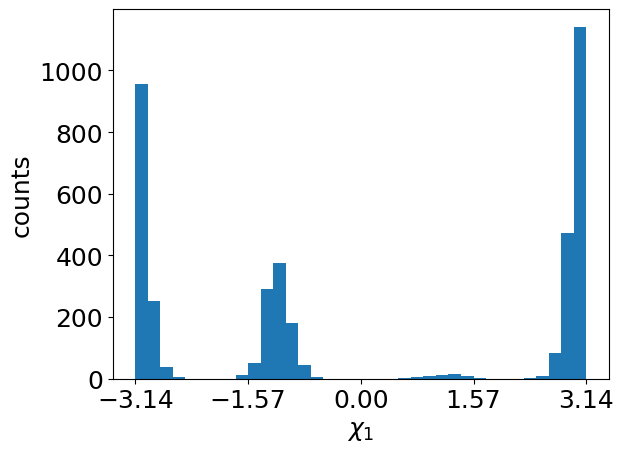

Residue 427


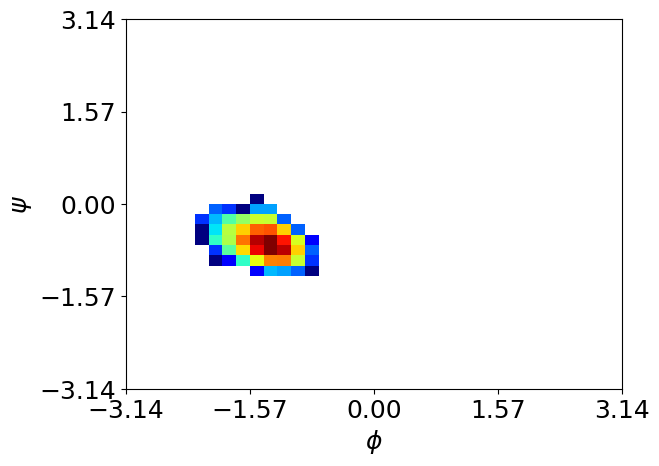

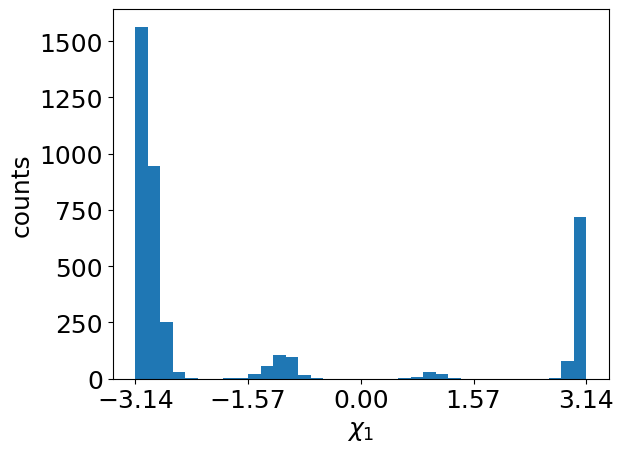

Residue 448


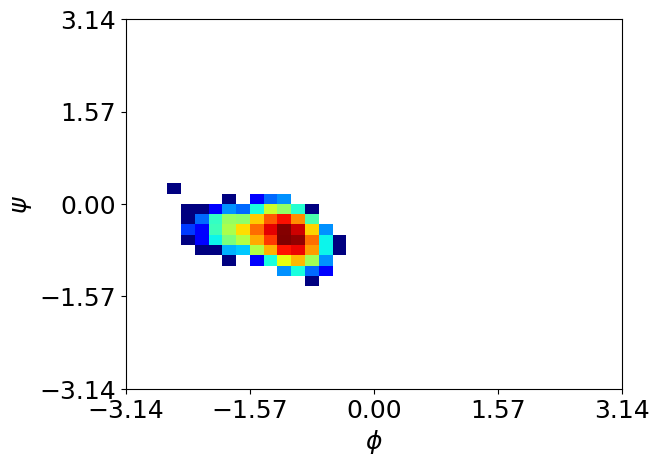

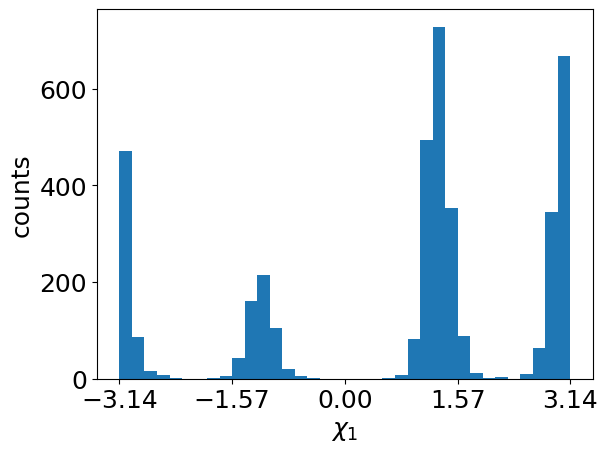

Residue 468


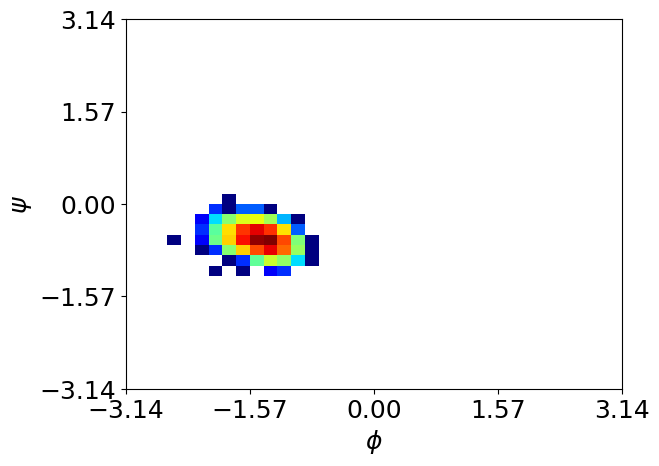

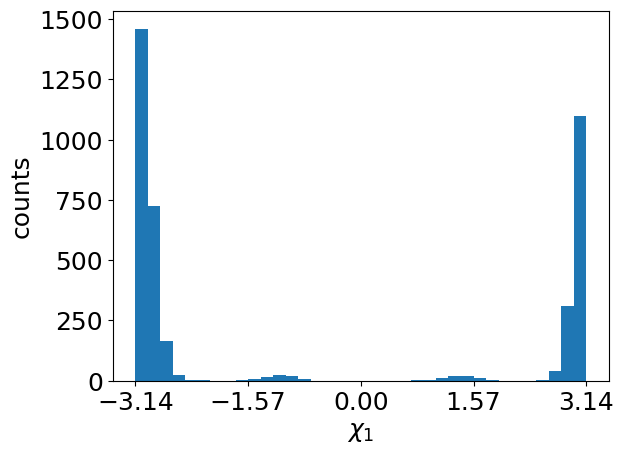

<Figure size 640x480 with 0 Axes>

In [86]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#Plot Val X1 values
for i in Val_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

***HOMEWORK Problem 3***

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**



determining if a residue has two rotameric states typically involves analyzing the conformational space of the residue, particularly focusing on the dihedral angles that define its side chain geometry.

Here's a general approach:

1. Dihedral Angle Calculation: Compute the dihedral angles (typically Chi angles) for the residue of interest. Chi angles are torsional angles that define the orientation of side-chain atoms.
2. Histogram Analysis: Plot a histogram of the dihedral angles. This histogram will reveal the distribution of different conformations adopted by the residue.
3. Peak Identification: Analyze the histogram to identify peaks. If there are two distinct peaks in the histogram, it suggests that the residue can adopt two different rotameric states.
4. Threshold Determination: Set a threshold or criterion for determining when two peaks are distinct enough to represent different rotameric states. This could involve statistical methods or domain knowledge.
5. Confirmation: Perform additional analysis or simulations to confirm that the identified peaks correspond to physically relevant rotameric states.
6. Comparison with Experimental Data: Compare the computational results with experimental data, if available, to validate the identified rotameric states.
7. Further Analysis: Investigate the structural context and energetic stability of the identified rotameric states to understand their biological significance.

***HOMEWORK Problem 4***

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**


***Challenge Problem 2***

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**


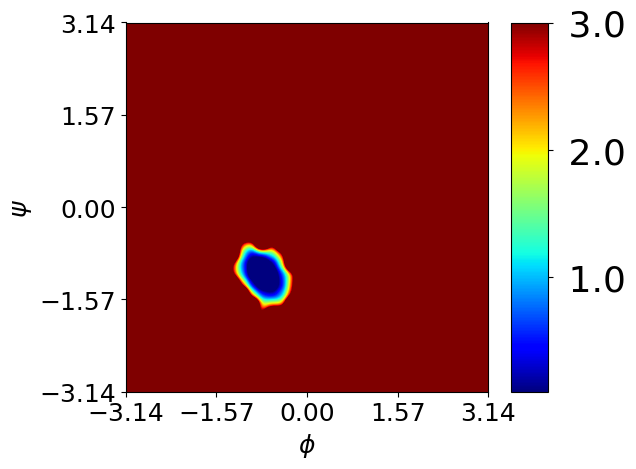

In [23]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(350)